# Zomato Delivery Operations Analytics

### Importing Necessary Libraries

In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading and Exploring the Data Set

In [552]:
df = pd.read_csv('Zomato Dataset.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2/12/22,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,3/4/22,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [553]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_min
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2/12/22,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,3/4/22,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [554]:
# Information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [555]:
#checking null values
pd.isnull(df).sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken_min                    0
dtype: int64

In [556]:
# fill missing numerical values with the mean and categorical values with the mode
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
    
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken_min                 0
dtype: int64

In [557]:
# Convert 'Order_Date' to datetime
df['Order_Date'] = df['Order_Date'].astype(str)

# Parse the dates with day-first format, allowing pandas to infer the format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')

# Handling any parsing errors
if df['Order_Date'].isnull().sum() > 0:
    print("There are dates that could not be parsed. Reviewing them:")
    print(df[df['Order_Date'].isnull()]['Order_Date'])

/var/folders/ss/tvhyyvb16xsd9pdjgjrc0_5m0000gn/T/ipykernel_58194/2075296925.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')


In [558]:
# Standardize categorical variables
df['Weather_conditions'] = df['Weather_conditions'].str.strip().str.title()
df['Road_traffic_density'] = df['Road_traffic_density'].str.strip().str.title()
df['Type_of_order'] = df['Type_of_order'].str.strip().str.title()
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.strip().str.title()
df['City'] = df['City'].str.strip().str.title()

In [559]:
# Converting numerical columns to appropriate types
numerical_columns = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude',
                     'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken_min']
for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          45584 non-null  float64       
 3   Delivery_person_Ratings      45584 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Time_Orderd                  45584 non-null  object        
 10  Time_Order_picked            45584 non-null  object        
 11  Weather_conditions           45584 non-nu

In [560]:
df['Order_Date'] = df['Order_Date'].dt.strftime('%d-%m-%Y')

# Objective Analytics

### Order Volume Analysis

In [561]:
# Group by Order_date and count the number of orders
orders_per_day = df.groupby('Order_Date').size().reset_index(name='Orders')
orders_per_day.head()

,Order_Date,Orders
0,02-11-2022,970
1,02-12-2022,864
2,03-01-2022,1140
3,03-02-2022,1012
4,03-03-2022,1150


In [562]:
# Convert Order_date back to datetime for sorting
orders_per_day['Order_Date'] = pd.to_datetime(orders_per_day['Order_Date'], format='%d-%m-%Y')

orders_per_day.head()

,Order_Date,Orders
0,2022-11-02,970
1,2022-12-02,864
2,2022-01-03,1140
3,2022-02-03,1012
4,2022-03-03,1150


In [563]:
# Sort by Order_date
orders_per_day = orders_per_day.sort_values(by='Order_Date', ascending=True).reset_index(drop=True)

orders_per_day.head()

,Order_Date,Orders
0,2022-01-03,1140
1,2022-01-04,1133
2,2022-02-03,1012
3,2022-02-04,992
4,2022-02-13,957


In [564]:
# Format the sorted 'Order_date' back to 'DD-MM-YYYY'
orders_per_day['Order_Date'] = orders_per_day['Order_Date'].dt.strftime('%d-%m-%Y')

orders_per_day.head()

,Order_Date,Orders
0,03-01-2022,1140
1,04-01-2022,1133
2,03-02-2022,1012
3,04-02-2022,992
4,13-02-2022,957


### Orders Per Day

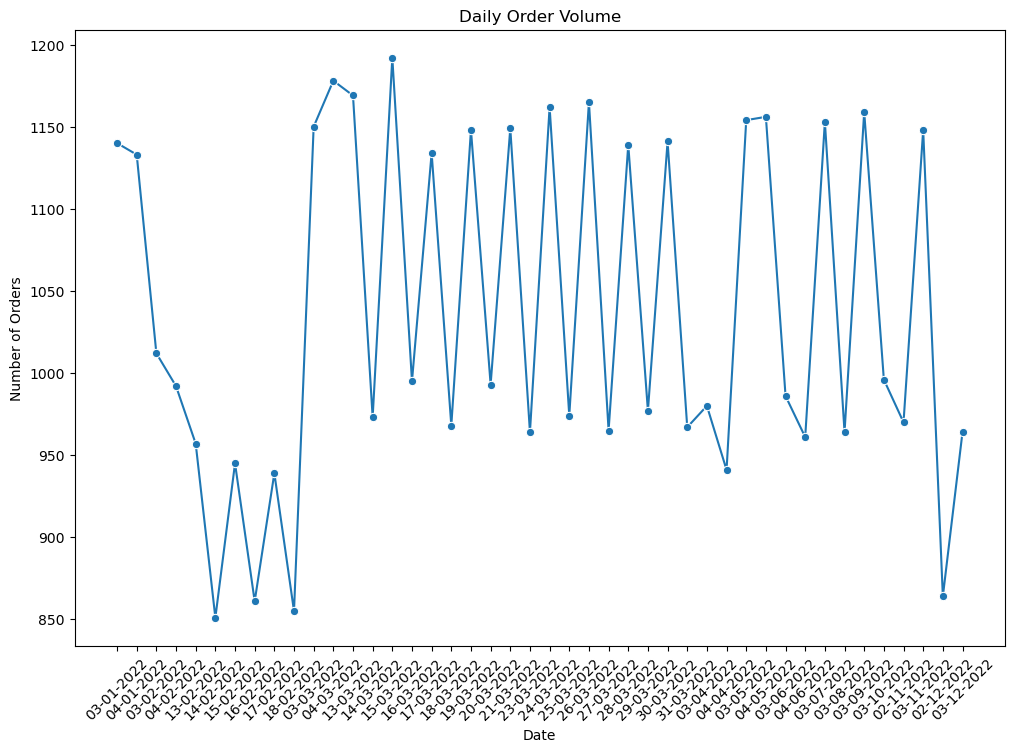

In [569]:
## Plotting Orders per Day with Order_date
plt.figure(figsize=(12,8))
sns.lineplot(data=orders_per_day, x='Order_Date', y='Orders', marker='o')
plt.title('Daily Order Volume')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()   

## Insights from the Orders Per Day Chart

#### Fluctuating Order Volumes:
The order volumes exhibit fluctuations across the observed period. There are noticeable peaks and troughs, indicating varying levels of activity on different days.
    
##### Peak Order Volume: 
The highest order volume recorded is 1192, demonstrating significant activity on that particular day.

##### Lowest Order Volume:
The lowest order volume is 851, suggesting a relatively quieter day in terms of orders.
 

### Orders Per Hour

In [531]:
# Extract hour from 'Time_Orderd'
df['Order_Hour'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M').dt.hour


In [532]:
# Compute number of orders per hour
orders_per_hour = df.groupby('Order_Hour').size().reset_index(name='Orders')

orders_per_hour.head()

,Order_Hour,Orders
0,0,430
1,8,1817
2,9,1947
3,10,1991
4,11,1961


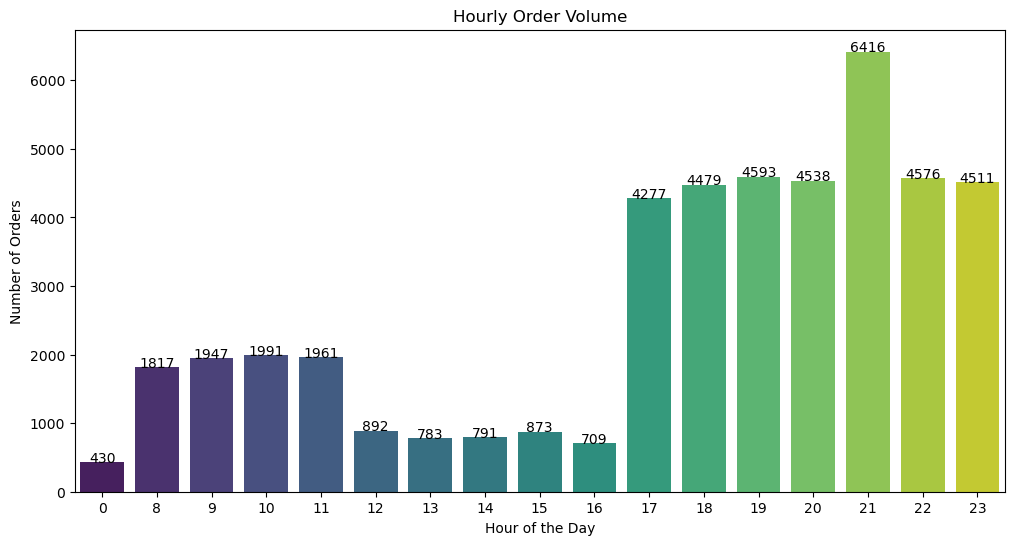

In [533]:
# Plotting Orders per Hour
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_per_hour, x='Order_Hour', y='Orders', palette='viridis')
plt.title('Hourly Order Volume')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')

for index, row in orders_per_hour.iterrows():
    plt.text(row.name, row.Orders, row.Orders, color='black', ha="center")
plt.show()    

## Insights from the Orders Per Hour Chart

#### Peak Ordering Hours:
The highest number of orders, 6416, occurs at 21:00 (9 PM). This indicates a significant spike in activity during the evening, likely due to dinner orders.

#### Evening Surge:
There is a notable increase in order volume starting from 17:00 (5 PM), peaking at 21:00 (9 PM). This period likely corresponds to people ordering dinner.

#### Late-Night Orders:
Orders remain relatively high even after 21:00, with a substantial number of orders at 22:00 (10 PM) and 23:00 (11 PM). This suggests that there is a consistent demand for late-night food delivery.

#### Low Early Morning Orders:
The number of orders is relatively low during the early morning hours. The lowest order volume is at 00:00 (midnight) with 430 orders, which gradually increases throughout the morning.

#### Midday Dip:
There is a noticeable dip in orders between 12:00 (noon) and 16:00 (4 PM), with the lowest at 16:00 (4 PM) at 709 orders. This suggests a quieter period, likely as it falls outside typical meal times.

#### Gradual Increase from Morning to Afternoon:
The number of orders increases gradually from early morning (starting at 8:00 AM) until it reaches a peak in the evening. This indicates a gradual buildup in demand throughout the day.

    

### Order Volume By City

In [534]:
#orders per city
orders_per_city = df.groupby('City').size().reset_index(name='Orders')

orders_per_city

,City,Orders
0,Metropolitian,35287
1,Semi-Urban,164
2,Urban,10133


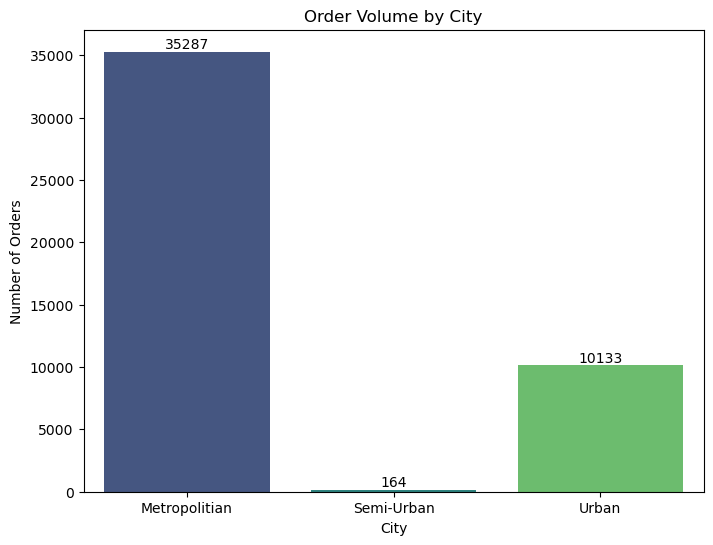

In [535]:
# Plotting Orders per City
plt.figure(figsize=(8,6))
sns.barplot(data=orders_per_city, x='City', y='Orders', palette='viridis')
plt.title('Order Volume by City')
plt.xlabel('City')
plt.ylabel('Number of Orders')

for index, row in orders_per_city.iterrows():
    plt.text(index, row.Orders, f'{row.Orders}', color='black', ha='center', va='bottom')

plt.show()

## Insights from the Orders Per City Chart

#### Metropolitan Dominance:
Metropolitan cities have the highest number of orders, totaling 35,287. This indicates a significant concentration of demand in these areas, likely due to higher population density and a greater number of restaurants and delivery services.

#### Urban Demand:
Semi-Urban cities follow with 10,133 orders. While not as high as Metropolitan areas, there is still a substantial volume of orders, suggesting growing demand in these regions.

#### Low Semi-Urban Orders:
Semi-Urban cities have the lowest number of orders at 164. This significant disparity could indicate fewer delivery services, lower population density, or different consumer behavior patterns compared to Metropolitan and Semi-Urban areas.

#### Disparity in Order Volume:
The chart highlights a stark difference between Metropolitan and Semi-Urban areas, with the former having vastly higher order volumes. This could be useful for targeting marketing efforts and resource allocation. 

### Average Delivery Time by Vehicle

In [536]:
delivery_time_vehicle = df.groupby('Type_of_vehicle')['Time_taken_min'].mean().reset_index()
delivery_time_vehicle['Time_taken_min'] = delivery_time_vehicle['Time_taken_min'].round(2)

delivery_time_vehicle

,Type_of_vehicle,Time_taken_min
0,Bicycle,26.43
1,Electric_Scooter,24.47
2,Motorcycle,27.61
3,Scooter,24.48


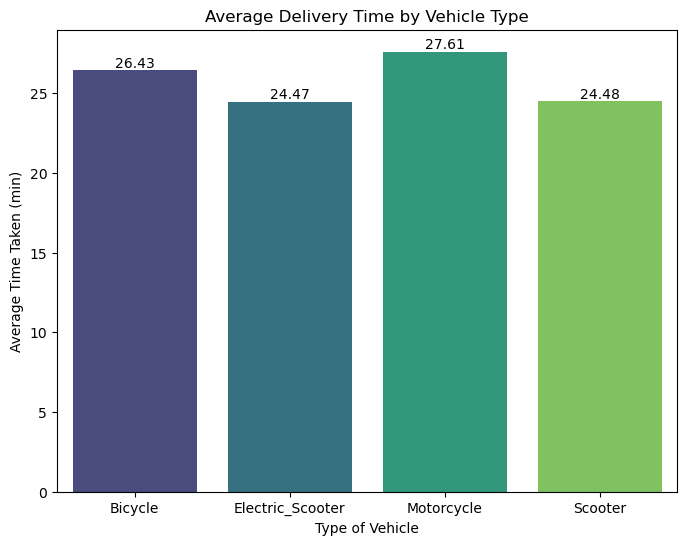

In [573]:
# Plotting Delivery Time by Vehicle Type
plt.figure(figsize=(8,6))
sns.barplot(data=delivery_time_vehicle, x='Type_of_vehicle', y='Time_taken_min', palette='viridis')
plt.title('Average Delivery Time by Vehicle Type')
plt.xlabel('Type of Vehicle')
plt.ylabel('Average Time Taken (min)')

for index, row in delivery_time_vehicle.iterrows():
    plt.text(index, row.Time_taken_min, f'{row.Time_taken_min}', color='black', ha='center', va='bottom')

plt.show()

## Insights from the Average Delivery Time by Vehicle Type Chart

#### Most Efficient Vehicles:
Electric Scooters have the lowest average delivery time of 24.47 minutes, making them the most efficient option among the vehicles considered.
Scooters follow closely with an average delivery time of 24.48 minutes, indicating a similarly high level of efficiency.

#### Moderately Efficient Vehicles:
Bicycles have an average delivery time of 26.43 minutes, which is slightly longer than the electric scooters and scooters. This suggests that bicycles, while efficient, are not as quick as motorized options.

#### Least Efficient Vehicle:
Motorcycles have the highest average delivery time of 27.61 minutes, making them the least efficient in terms of delivery speed among the types analyzed. This might be surprising as motorcycles are generally considered fast. The higher average might be influenced by factors such as traffic, route complexity, or usage conditions.    

### Average Delivery Duration Per City

In [538]:
#average delivery time per city
delivery_time_city = df.groupby('City')['Time_taken_min'].mean().reset_index().round(2)

delivery_time_city

,City,Time_taken_min
0,Metropolitian,27.14
1,Semi-Urban,49.73
2,Urban,22.98


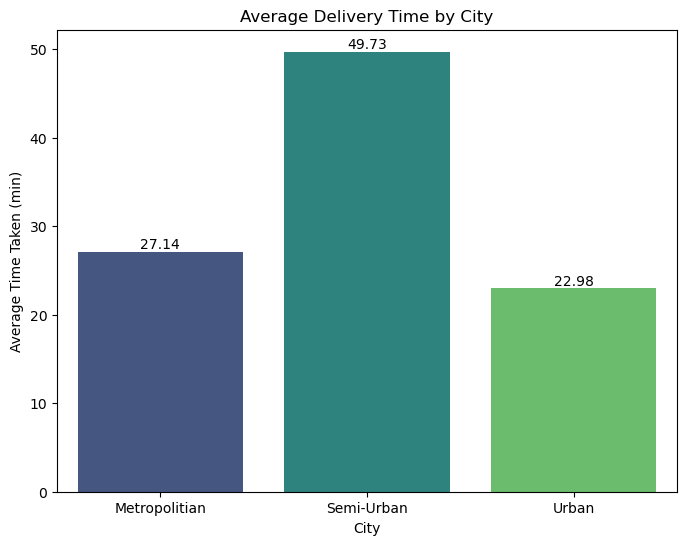

In [539]:
# Plotting Average Delivery Time Per City
plt.figure(figsize=(8,6))
sns.barplot(data=delivery_time_city, x='City', y='Time_taken_min', palette='viridis')
plt.title('Average Delivery Time by City')
plt.xlabel('City')
plt.ylabel('Average Time Taken (min)')


for index, row in delivery_time_city.iterrows():
    plt.text(index, row.Time_taken_min, f'{row.Time_taken_min}', color='black', ha='center', va='bottom')

plt.show()

## Insights from the Average Delivery Time by City Type Chart
    
#### Urban Cities:
Urban cities have the lowest average delivery time of 22.98 minutes. This indicates that deliveries in urban areas are the fastest among the three city types. The relatively shorter distances and potentially less traffic congestion might contribute to this efficiency.

#### Metropolitan Cities:
Metropolitan cities have an average delivery time of 27.14 minutes. While slightly longer than urban areas, this is still relatively efficient, considering the high population density and potential traffic challenges in larger metropolitan areas.

#### Semi-Urban Cities:
Semi-Urban cities have the highest average delivery time of 49.73 minutes. This significantly higher delivery time suggests that deliveries in semi-urban areas face more challenges, such as longer distances between delivery points, potentially less developed infrastructure, and possibly less efficient delivery networks.    


### Delivery Time vs Traffic Density

In [540]:
# average delivery time by traffic density
delivery_time_traffic = df.groupby('Road_traffic_density')['Time_taken_min'].mean().reset_index().round(2)

delivery_time_traffic

,Road_traffic_density,Time_taken_min
0,High,27.24
1,Jam,31.18
2,Low,21.46
3,Medium,26.70


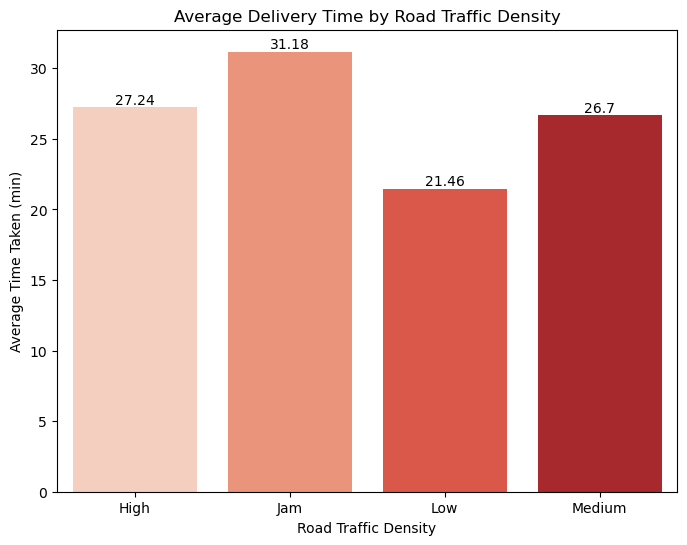

In [541]:
# Plotting Delivery Time vs Traffic Density
plt.figure(figsize=(8,6))
sns.barplot(data=delivery_time_traffic, x='Road_traffic_density', y='Time_taken_min', palette='Reds')
plt.title('Average Delivery Time by Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Average Time Taken (min)')

for index, row in delivery_time_traffic.iterrows():
    plt.text(index, row.Time_taken_min, f'{row.Time_taken_min}', color='black', ha='center', va='bottom')

plt.show()

## Insights from the Average Delivery Time by Road Traffic Density Chart

#### Jam Traffic:
Highest Average Delivery Time: The "Jam" category has the highest average delivery time at 31.18 minutes. This indicates severe traffic congestion significantly impacts delivery efficiency, causing the longest delays among all categories.

#### Low Traffic:
Lowest Average Delivery Time: The "Low" category has the lowest average delivery time at 21.46 minutes. This suggests that when traffic density is low, deliveries are much faster, likely due to less congestion and smoother routes.

#### High Traffic:
Moderate Impact on Delivery Time: The "High" traffic density category has an average delivery time of 27.24 minutes. While not as extreme as the "Jam" category, high traffic still causes considerable delays compared to low traffic conditions.

#### Medium Traffic:
Balanced Impact: The "Medium" traffic density category has an average delivery time of 26.7 minutes. This indicates a moderate impact on delivery times, sitting between the low and high traffic conditions.    

### Delivery Time vs Weather Conditions


In [542]:
#average delivery time by weather conditions
delivery_time_weather = df.groupby('Weather_conditions')['Time_taken_min'].mean().reset_index().round(2)

delivery_time_weather

,Weather_conditions,Time_taken_min
0,Cloudy,28.92
1,Fog,28.74
2,Sandstorms,25.88
3,Stormy,25.87
4,Sunny,21.86
5,Windy,26.12


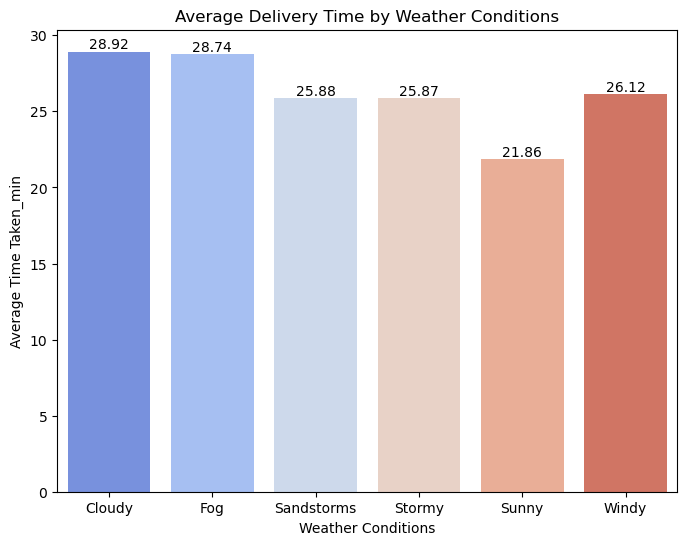

In [543]:
# Plotting Delivery Time vs Weather Conditions
plt.figure(figsize=(8,6))
sns.barplot(data=delivery_time_weather, x='Weather_conditions', y='Time_taken_min', palette='coolwarm')
plt.title('Average Delivery Time by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Time Taken_min')


for index, row in delivery_time_weather.iterrows():
    plt.text(index, row.Time_taken_min, f'{row.Time_taken_min}', color='black', ha='center', va='bottom')

plt.show()

## Insights from the Average Delivery Time by Weather Condition Chart
    
#### Cloudy Conditions:
Longest Average Delivery Time: Deliveries under cloudy conditions have the highest average time of 28.92 minutes. This might be due to reduced visibility or more cautious driving.

#### Foggy Conditions:
High Average Delivery Time: Foggy conditions also result in a high average delivery time of 28.74 minutes. Fog can significantly reduce visibility, causing delays and slower travel speeds.

#### Sandstorms and Stormy Weather:
Moderately High Delivery Times: Both sandstorms and stormy weather have similar average delivery times, with sandstorms at 25.88 minutes and stormy weather at 25.87 minutes. These conditions can be hazardous, requiring extra caution and slower speeds.

#### Windy Conditions:
Moderate Impact: Windy conditions lead to an average delivery time of 26.12 minutes. Strong winds can affect vehicle stability and safety, contributing to slightly longer delivery times.

#### Sunny Conditions:
Shortest Average Delivery Time: Deliveries in sunny conditions have the lowest average time of 21.86 minutes. Good weather typically results in smoother and faster deliveries due to better visibility and safer driving conditions.  

### Impact of Traffic Density and Weather Conditions

In [544]:
#pivot table
pivot_traffic_weather = df.pivot_table(values='Time_taken_min', index='Road_traffic_density', columns='Weather_conditions', aggfunc='mean').round(2)

pivot_traffic_weather

Weather_conditions,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy
Road_traffic_density,,,,,,
High,28.94,28.45,27.71,27.85,23.45,26.97
Jam,36.69,36.80,30.02,29.85,23.08,30.22
Low,22.21,23.10,20.29,20.68,21.45,20.67
Medium,28.48,28.04,27.74,27.68,20.20,27.89


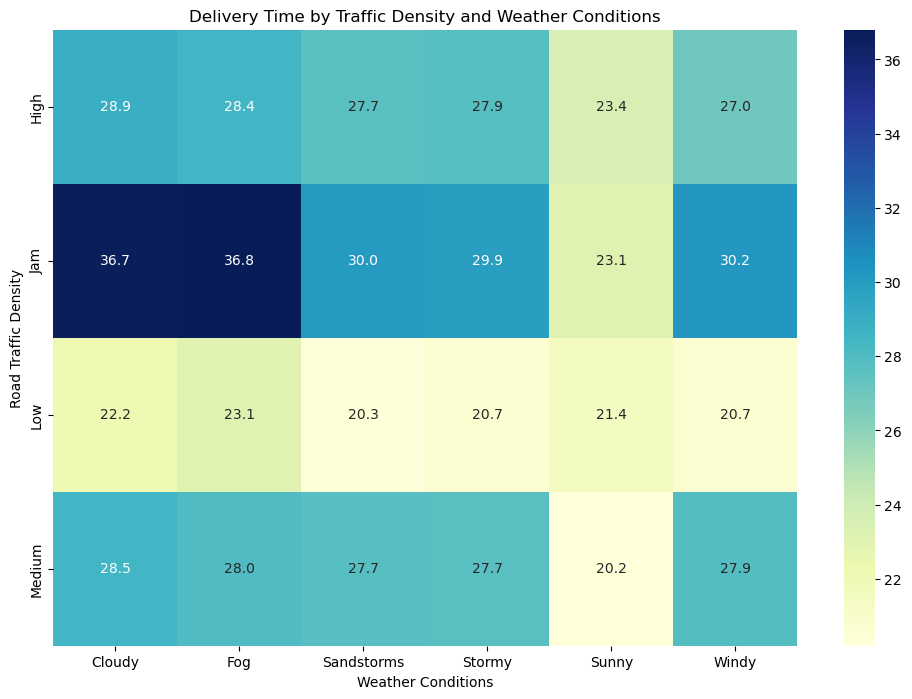

In [545]:
# Heatmap of Delivery Time by Traffic Density and Weather Conditions
plt.figure(figsize=(12,8))
sns.heatmap(pivot_traffic_weather, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Delivery Time by Traffic Density and Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Road Traffic Density')
plt.show()

## Insights from the Heatmap

#### Traffic Jams and Weather Impact:
Cloudy and Foggy Conditions with Traffic Jams: Delivery times are longest during traffic jams, especially under cloudy and foggy conditions, reaching 36.7 minutes and 36.8 minutes, respectively. This suggests that poor visibility combined with heavy traffic significantly hampers delivery efficiency.

#### Lowest Delivery Times:
Sunny and Low Traffic: The shortest delivery times occur under low traffic density with sunny weather, with an average time of 20.2 minutes. This indicates optimal conditions for quick deliveries due to good visibility and minimal congestion.

#### High Traffic Density:
General Impact: High traffic density generally leads to longer delivery times compared to low and medium traffic densities. This is evident across most weather conditions, where high traffic consistently results in increased delivery times.

#### Sandstorms and Stormy Weather:
Moderate Delivery Times: Conditions like sandstorms and stormy weather show moderate delivery times across different traffic densities. These weather conditions tend to slow down deliveries but are less impactful than cloudy or foggy conditions combined with traffic jams.

#### Windy Conditions:
Relatively Shorter Delivery Times: Windy conditions result in relatively shorter delivery times across all traffic densities compared to other adverse weather conditions. This indicates that wind, while challenging, is less disruptive to delivery times than factors like fog or heavy traffic jams.    

### Delivery Performance During Festivals

In [546]:
# Average delivery time during and outside festivals
delivery_time_festival = df.groupby('Festival')['Time_taken_min'].mean().reset_index().round(2)

delivery_time_festival

,Festival,Time_taken_min
0,No,25.91
1,Yes,45.52


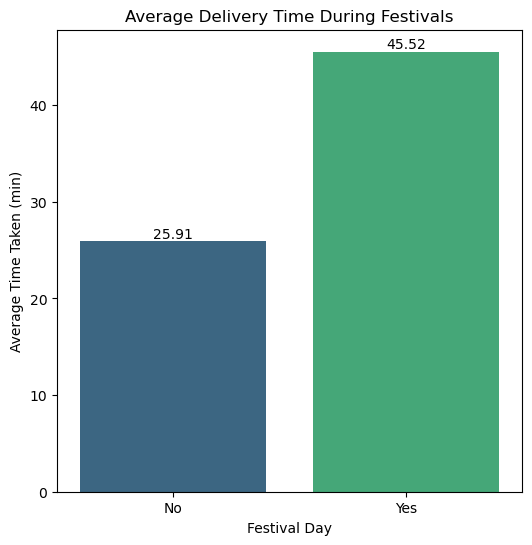

In [547]:
# Plotting Delivery Time During Festivals
plt.figure(figsize=(6,6))
sns.barplot(data=delivery_time_festival, x='Festival', y='Time_taken_min', palette='viridis')
plt.title('Average Delivery Time During Festivals')
plt.xlabel('Festival Day')
plt.ylabel('Average Time Taken (min)')

for index, row in delivery_time_festival.iterrows():
    plt.text(index, row.Time_taken_min, f'{row.Time_taken_min}', color='black', ha='center', va='bottom')

plt.show()

## Insights from the Average Delivery Time During Festival and Non-Festival Days Chart
    
#### Significantly Longer Delivery Times on Festival Days:
The average delivery time on festival days is 45.52 minutes, which is substantially longer than on non-festival days. This suggests that increased demand, traffic congestion, and possibly more complex delivery logistics contribute to delays during festivals.

#### Relatively Shorter Delivery Times on Non-Festival Days:
On non-festival days, the average delivery time is 25.91 minutes. This indicates a more efficient delivery process under normal conditions, likely due to lower demand and less traffic.

#### Impact of Festive Periods on Operations:
The significant difference in delivery times highlights the operational challenges that businesses face during festivals. Increased order volumes, crowded roads, and possibly limited availability of delivery personnel can all contribute to longer delivery times.   